### Compare unemployment data sources

In [1]:
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
data_path = "./Data"
os.chdir(data_path)

In [3]:
# Data taken from http://www.stats.gov.nl.ca/statistics/Labour/PDF/UnempRate_Monthly.pdf

canada_unemp_gov = pd.read_csv('Canada_UnempRate_Monthly_2015.csv', delimiter=' ')

canada_unemp_gov.index = pd.to_datetime("01-" + canada_unemp_gov['Date'])
del canada_unemp_gov['Date']

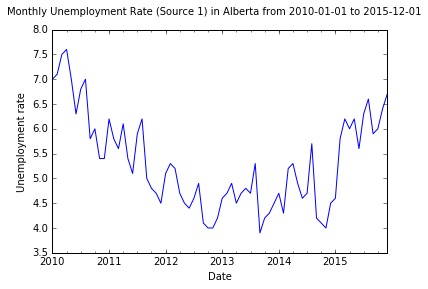

In [4]:
canada_unemp_gov['Alberta'].plot()
plt.suptitle('Monthly Unemployment Rate (Source 1) in Alberta from 2010-01-01 to 2015-12-01')
plt.ylabel('Unemployment rate')

In [5]:
# Data taken from http://economicdashboard.albertacanada.com/Unemployment

canada_unemp_edb = pd.read_csv('Canada_unemp_rate.csv', index_col=0, parse_dates=True)

canada_unemp_edb['AgeGroup'] = canada_unemp_edb['AgeGroup'].astype('category')
canada_unemp_edb['Sex'] = canada_unemp_edb['Sex'].astype('category')

In [6]:
over15 = canada_unemp_edb['AgeGroup'].cat.categories[1]
over15

'15 years and over'

In [7]:
alberta_unemp_males_over15 = \
    canada_unemp_edb[\
        (canada_unemp_edb['Sex'] == 'Males') & \
        (canada_unemp_edb['AgeGroup'] == over15)]['Alberta']

alberta_unemp_males_over15.head()

When
1976-01-01    3.8
1976-02-01    3.4
1976-03-01    3.4
1976-04-01    3.4
1976-05-01    3.4
Name: Alberta, dtype: float64

In [8]:
alberta_unemp_females_over15 = \
    canada_unemp_edb[\
        (canada_unemp_edb['Sex'] == 'Females') & \
        (canada_unemp_edb['AgeGroup'] == over15)]['Alberta']

alberta_unemp_females_over15.head()

When
1976-01-01    5.2
1976-02-01    4.3
1976-03-01    4.4
1976-04-01    3.6
1976-05-01    5.5
Name: Alberta, dtype: float64

In [9]:
unemp_data_comparison = pd.concat(
    [canada_unemp_gov['Alberta'], alberta_unemp_males_over15, alberta_unemp_females_over15], axis=1)

unemp_data_comparison.columns = ['Source 1', 'Source 2 (Males)', 'Source 2 (Females)']

unemp_data_comparison = unemp_data_comparison[np.isfinite(unemp_data_comparison['Source 1']) & \
                                              np.isfinite(unemp_data_comparison['Source 2 (Males)']) & \
                                              np.isfinite(unemp_data_comparison['Source 2 (Females)'])]

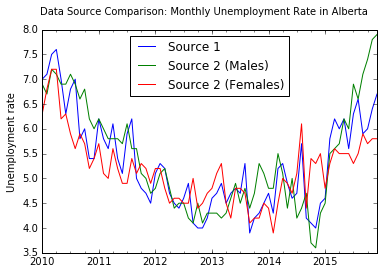

In [10]:
unemp_data_comparison.plot()
plt.suptitle('Data Source Comparison: Monthly Unemployment Rate in Alberta')
plt.ylabel('Unemployment rate')

In [11]:
male_factor = 0.5

alberta_unemp_over15 = (alberta_unemp_males_over15 * male_factor + 
                        alberta_unemp_females_over15 * (1 - male_factor))

In [12]:
unemp_data_comparison = pd.concat(
    [canada_unemp_gov['Alberta'], alberta_unemp_over15], axis=1)

unemp_data_comparison.columns = ['Source 1', 'Source 2']

unemp_data_comparison = unemp_data_comparison[np.isfinite(unemp_data_comparison['Source 1']) & \
                                              np.isfinite(unemp_data_comparison['Source 2'])]

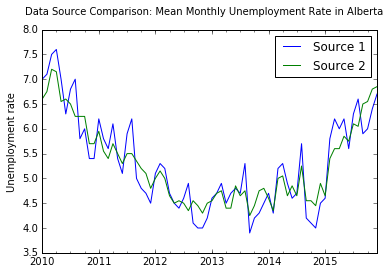

In [13]:
unemp_data_comparison.plot()
plt.suptitle('Data Source Comparison: Mean Monthly Unemployment Rate in Alberta')
plt.ylabel('Unemployment rate')

In [14]:
unemp_roll_mean = pd.rolling_mean(unemp_data_comparison, 5, center=True)

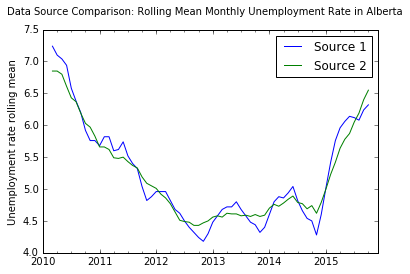

In [15]:
unemp_roll_mean.plot()
plt.suptitle('Data Source Comparison: Rolling Mean Monthly Unemployment Rate in Alberta')
plt.ylabel('Unemployment rate rolling mean')